# Mastering Twitter and Instagram with Python



In this notebook we will see how to master data analysis from social networks.

We will use data from **Twitter** and **Instagram**.

## Twitter
Let's see, first of all, how to interact with Twitter through the REST API.

The code you will see is "ready to use", so you can easily use and reuse this notebook with few modifications.

I will use a library, **tweepy**, which will allow us to search for messages that interest us and **pandas** to put our data in quality.

So we don't use the API provided directly by Twitter (it's still possible to do so), but a **wrapper** written and maintained by a community.

In object programming languages, a wrapper is "an object that contains other objects": we build a frame that makes the functions contained in a library available abroad, in an easy way. 

Let's go install everything we need for the lab...

*   tweepy (https://github.com/tweepy/tweepy)
*   pandas



In [6]:
!pip uninstall tweepy

In [7]:
!pip install --user tweepy==4.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 94 kB 2.1 MB/s 
     |████████████████████████████████| 62 kB 785 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Let's go import the modules we need for our work:
- numpy
- pandas
- tqdm 
- **tweepy**

In [16]:
import tweepy
import numpy as np
import pandas as pd
import pprint
from tqdm import tqdm_notebook as tqdm 

First, we have to authorize our "app", we use the keys we generated for this purpose.

We need the four values to authenticate with OAuth2:
- consumer key
- consumer secret
- access token
- access secret
- bearer_token

(specify your **keys**... )

In [17]:
consumer_key = 'relzm0nIaDnta3gJZu9hgCm7M'
consumer_secret = '8g9BJEHg6AnmwPY6IbZusKFMxlFi4LmudW53td57eCOTZ6A9u2'
access_token = '164224789-AmWFzkhBrIjGBYHzYrpGX0dp4aD90KhcPHAO9f3t'
access_token_secret = 'B0rr4zyo8MqL6AQDOl26V8lWysZb9ZdzsrkE51bS58jOI'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAGisdQEAAAAAl0kJBkk3IOavUNl7EvkIfbKmsj0%3DNnlAW0AgADhAes5GEYMWwuZy945qNNivTQG6j40iJJ73PgVdWZ'

client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret, 
                        wait_on_rate_limit=True)




The variable **client** is now the starting point for all our operations with **Twitter**.

The **wait_on_rate_limit** parameter enables management of the client-side **rate_limit**. In this way we avoid *being blocked* for too much traffic.


Let’s search Tweets from Atalanta_BC’s Twitter account (@Atalanta_BC)
from the last 7 days (search_recent_tweets).

We exclude Retweets and limit the result to a maximum of 100 Tweets.
We also include some additional information with tweet_fields (author id and when the Tweet was created).


In [45]:
# Define query
query = 'from:Atalanta_BC -is:retweet'

# get max. 100 tweets
tweets = client.search_recent_tweets(query=query, 
                                     tweet_fields = ["created_at", "text", "source", "context_annotations", "author_id"],
                                     user_fields = ["name", "username", "location", "verified", "description"],
                                     expansions='author_id',
                                     max_results=100)

In [46]:
first_tweet = tweets.data[0]
dict(first_tweet)

{'author_id': 338995273,
 'context_annotations': [{'domain': {'description': 'A sports team organization, like Arsenal and the Boston Celtics',
    'id': '12',
    'name': 'Sports Team'},
   'entity': {'id': '731226167089332224', 'name': 'Atalanta BC'}}],
 'created_at': datetime.datetime(2022, 6, 21, 18, 0, 2, tzinfo=datetime.timezone.utc),
 'id': 1539307166854782976,
 'source': 'Twitter Web App',
 'text': '#OnThisDay 📆 2020\n\nLa ripartenza 🔄🙏 The restart\n\n#GoAtalantaGo ⚫️🔵 https://t.co/sYVwhgS9RG'}

In [47]:
# user information for the first tweet
first_tweet_user = tweets.includes["users"][0]
dict(first_tweet_user)

{'description': '⚽ Official profile of Atalanta Bergamasca Calcio \n📍 Bergamo \n🏟 Gewiss Stadium\n🎮 @atalantaesports\n🖤💙 #GoAtalantaGo #ForzaAtalanta',
 'id': 338995273,
 'location': 'Bergamo (BG) - Italy',
 'name': 'Atalanta B.C.',
 'username': 'Atalanta_BC',
 'verified': True}

In [48]:
tweets_data = tweets.data
for tweet in tweets_data[:2]:
    print(tweet["text"])
    if len(tweet["context_annotations"]) > 0:
        pprint.pprint(tweet["context_annotations"])
    print('-----------------------------------------------')

#OnThisDay 📆 2020

La ripartenza 🔄🙏 The restart

#GoAtalantaGo ⚫️🔵 https://t.co/sYVwhgS9RG
[{'domain': {'description': 'A sports team organization, like Arsenal and the '
                            'Boston Celtics',
             'id': '12',
             'name': 'Sports Team'},
  'entity': {'id': '731226167089332224', 'name': 'Atalanta BC'}}]
-----------------------------------------------
Cheeese 😁 #NationalSelfieDay 

@musso_juan #GoAtalantaGo ⚫️🔵 https://t.co/LInHGFohQo
[{'domain': {'description': 'Named people in the world like Nelson Mandela',
             'id': '10',
             'name': 'Person'},
  'entity': {'id': '733774501435953152', 'name': 'Juan Musso'}},
 {'domain': {'description': 'A sports team organization, like Arsenal and the '
                            'Boston Celtics',
             'id': '12',
             'name': 'Sports Team'},
  'entity': {'id': '731226167089332224', 'name': 'Atalanta BC'}},
 {'domain': {'description': 'Entity Service related Events domain',
 

Convert tweets to a Pandas dataframe

In [54]:
tweets.includes

{'users': [<User id=338995273 name=Atalanta B.C. username=Atalanta_BC>]}

In [58]:
import pandas as pd
tweet_info_ls = []
user_info_ls = []

# iterate over each tweet and corresponding user details
for tweet in tweets.data:
    tweet_info = {
        'created_at': tweet.created_at,
        'text': tweet.text,
        'source': tweet.source,
        'author_id': tweet.author_id
    }
    tweet_info_ls.append(tweet_info)


for user in tweets.includes["users"]:
    user_info = {
        'author_id': user.id,
        'name': user.name,
        'username': user.username,
        'location': user.location,
        'verified': user.verified,
        'description': user.description
    }
    user_info_ls.append(user_info)

tweets_df = pd.DataFrame(tweet_info_ls)
users_df = pd.DataFrame(user_info_ls)

tweets_final_df = tweets_df.merge(users_df, on=["author_id"], how="left")


In [59]:
len(users_df)

1

In [60]:
len(tweets_df)

27

In [61]:
# display the dataframe
tweets_final_df.head()

,created_at,text,source,author_id,name,username,location,verified,description
0,2022-06-21 18:00:02+00:00,#OnThisDay 📆 2020\n\nLa ripartenza 🔄🙏 The rest...,Twitter Web App,338995273,Atalanta B.C.,Atalanta_BC,Bergamo (BG) - Italy,True,⚽ Official profile of Atalanta Bergamasca Calc...
1,2022-06-21 17:15:00+00:00,Cheeese 😁 #NationalSelfieDay \n\n@musso_juan #...,Twitter Web App,338995273,Atalanta B.C.,Atalanta_BC,Bergamo (BG) - Italy,True,⚽ Official profile of Atalanta Bergamasca Calc...
2,2022-06-21 15:59:56+00:00,... The celebration ⬇️🤪\n\n#Palomino #GoAtalan...,Twitter Web App,338995273,Atalanta B.C.,Atalanta_BC,Bergamo (BG) - Italy,True,⚽ Official profile of Atalanta Bergamasca Calc...
3,2022-06-21 15:58:44+00:00,21/22 Moments 🎬 \n\nThe goal 🤯 ⬇️ ...\n\n#Pal...,Twitter Media Studio,338995273,Atalanta B.C.,Atalanta_BC,Bergamo (BG) - Italy,True,⚽ Official profile of Atalanta Bergamasca Calc...
4,2022-06-21 11:09:32+00:00,𝗚𝗨𝗘𝗦𝗦 𝗪𝗛𝗢 | ✅\n\nAnd it was... \nIGOR BUDAN\n\...,Twitter for Android,338995273,Atalanta B.C.,Atalanta_BC,Bergamo (BG) - Italy,True,⚽ Official profile of Atalanta Bergamasca Calc...


# Search



Let's look for all tweets related to **#Spread**
(or you can specify a search to your liking)

We use the bee `.search_recent_tweets` which provides these parameters:
- `query` the query string to submit to Twitter

Let's collect more than 10,000 status and go save them in a list.

In [157]:
query = 'maturita2022'


tweets_data_total = []
for tweet in tweepy.Paginator(client.search_recent_tweets, query=query,
                              tweet_fields=['context_annotations', "text", "source", 'created_at', 'author_id', 'public_metrics', 'geo'],
                              #media_fields=['preview_image_url'],
                              #place_fields=['place_type', 'geo'],
                              user_fields = ["name", "username", "location", "verified", "description"],
                              expansions='author_id',
                              max_results=100, limit=100):
    tweets_data_total.append(tweet)



In [163]:
len(tweets_data_total)

100

In [160]:
tweet_info_ls = []
user_info_ls = []

def extract_hash_tags(s):
  return set(part[1:] for part in s.split() if part.startswith('#'))

# iterate over each tweet and corresponding user details
for t in tweets_data_total:
    tweets = t.data
    for tweet in tweets:
      tweet_info = {
          'created_at': tweet.created_at,
          'text': tweet.text,
          'source': tweet.source,
          'author_id': tweet.author_id,
          'retweet_count': tweet.public_metrics["retweet_count"] if 'retweet_count' in tweet.public_metrics else 0,
          'like_count': tweet.public_metrics["like_count"],
          'hashtags': extract_hash_tags(tweet.text)
      }
      tweet_info_ls.append(tweet_info)


for t in tweets_data_total:
    users = t.includes["users"]
    for user in users:
      user_info = {
          'author_id': user.id,
          'name': user.name,
          'username': user.username,
          'location': user.location,
          'verified': user.verified,
          'user_description': user.description
      }
      user_info_ls.append(user_info)

tweets_df = pd.DataFrame(tweet_info_ls)
users_df = pd.DataFrame(user_info_ls)

tweets_final_df = tweets_df.merge(users_df, on=["author_id"], how="left")


In [161]:
len(tweets_final_df)

30753

In [162]:
tweets_final_df

,created_at,text,source,author_id,retweet_count,like_count,hashtags,name,username,location,verified,user_description
0,2022-06-21 22:12:55+00:00,RT @howajtow: la commissione orale mentre dirò...,Twitter for iPhone,1380560416410116097,285,0,{maturita2022},ΛƧIΛ,asiaortolanii,"Forlì-Cesena, Emilia Romagna",False,in allegato: problemi esistenziali ma tante ri...
1,2022-06-21 22:12:50+00:00,Che ansia ora mi metto a ripassare qualcosa\n#...,Twitter for iPhone,905001220414345217,0,0,{Maturità2022},ℛ𝑜𝑠 𝘥𝘦𝘷𝘦 𝘮𝘢𝘵𝘶𝘳𝘢𝘳𝘴𝘪🥵,roserome1927,Caput Mundi,False,Parlo di tante cose | she/her | ASR - EL92 & L...
2,2022-06-21 22:12:50+00:00,Che ansia ora mi metto a ripassare qualcosa\n#...,Twitter for iPhone,905001220414345217,0,0,{Maturità2022},ℛ𝑜𝑠 𝘥𝘦𝘷𝘦 𝘮𝘢𝘵𝘶𝘳𝘢𝘳𝘴𝘪🥵,roserome1927,Caput Mundi,False,Parlo di tante cose | she/her | ASR - EL92 & L...
3,2022-06-21 22:12:50+00:00,Che ansia ora mi metto a ripassare qualcosa\n#...,Twitter for iPhone,905001220414345217,0,0,{Maturità2022},ℛ𝑜𝑠 𝘥𝘦𝘷𝘦 𝘮𝘢𝘵𝘶𝘳𝘢𝘳𝘴𝘪🥵,roserome1927,Caput Mundi,False,Parlo di tante cose | she/her | ASR - EL92 & L...
4,2022-06-21 22:12:50+00:00,Che ansia ora mi metto a ripassare qualcosa\n#...,Twitter for iPhone,905001220414345217,0,0,{Maturità2022},ℛ𝑜𝑠 𝘥𝘦𝘷𝘦 𝘮𝘢𝘵𝘶𝘳𝘢𝘳𝘴𝘪🥵,roserome1927,Caput Mundi,False,Parlo di tante cose | she/her | ASR - EL92 & L...
...,...,...,...,...,...,...,...,...,...,...,...,...
30748,2022-06-21 08:36:29+00:00,Io domani punto alla traccia B o C sperando ch...,Twitter for Android,3304595717,0,1,{maturita2022},djoker19,celi_luca,None,False,
30749,2022-06-21 08:36:29+00:00,Io domani punto alla traccia B o C sperando ch...,Twitter for Android,3304595717,0,1,{maturita2022},djoker19,celi_luca,None,False,
30750,2022-06-21 08:36:29+00:00,Io domani punto alla traccia B o C sperando ch...,Twitter for Android,3304595717,0,1,{maturita2022},djoker19,celi_luca,None,False,
30751,2022-06-21 08:36:18+00:00,RT @lov3lss: #maturita2022 \normai così disper...,Twitter for iPhone,3624299914,594,0,{maturita2022},Marta🐧,_martuccia_,None,False,


In [ ]:
tweets_final_df[tweets_final_df["hashtags"].str.len()>0]["hashtags"]

Okay, we have about **30,000** status.

Let's see how we can use them for our analysis. We use, as always, `Pandas`...


In [164]:
tweets_final_df.to_csv('sc_twitter.csv')

### Hashtag analysis

Let's go pull out the hashtags and try to put them on a list.

In [165]:
list_hashtag_strings = []
for i, entry in tweets_final_df.iterrows():
    for hashtag in entry["hashtags"]:
        list_hashtag_strings.append(hashtag.strip().lower().replace(' ',','))
list_hashtag_strings[:10]

['maturita2022',
 'maturità2022',
 'maturità2022',
 'maturità2022',
 'maturità2022',
 'maturità2022',
 'maturita2013',
 'maturita2022',
 'maturita2022',
 'maturita2022']

Let's group the hashtags, move them to a DataFrame and count them by looking for the most common ones.

To do this we use the `groupby` method of pandas.

In [166]:
hashtag = pd.DataFrame(list_hashtag_strings)
hashtag.columns = ['hashtag']
df_hashtag = hashtag.groupby(['hashtag'])['hashtag'].count().sort_values(ascending=False)
df_hashtag.head(20)


hashtag
maturita2022            23845
maturità2022             2868
notteprimadegliesami      796
21giugno                  318
maturità                  245
sanremo2023               213
qualcosapercui            179
maturita2022…             149
briatore                  147
vauro                     140
uomoniedonne              140
isola                     138
maturità2022,             119
lockdownsubito            114
dimaio                    103
notteprimadegl…            91
lituania                   91
discorddown                81
maturita                   79
fearwomen                  74
Name: hashtag, dtype: int64

We save the results in two files
- the first file will contain the hashtag list
- the second file will contain the relationship between status and hashtag

In [167]:
df_hashtag.to_csv('sc_hashtag.csv', header=True)

In [168]:
status_hashtag = []
for status_id, entry in tweets_final_df.iterrows():
    for hashtag in entry['hashtags']:
        status_hashtag.append({'id': status_id, 'hashtag': hashtag.strip().lower()})

In [169]:
df_status_hashtag = pd.DataFrame(status_hashtag)
df_status_hashtag.set_index(['id','hashtag'])
df_status_hashtag.to_csv('sc_hashtag_status.csv', header=True)

### Wordcloud

Let's try some visualization libraries in **Python**.
One of the most used (and perhaps least useful) ways to display text is WordCloud.

Let's install the `wordcloud` library.

In [170]:
!pip install --user wordcloud
!pip install --user matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [171]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

We create a list of hashtags by concatenating all the elements of the original list and separating them with a space.

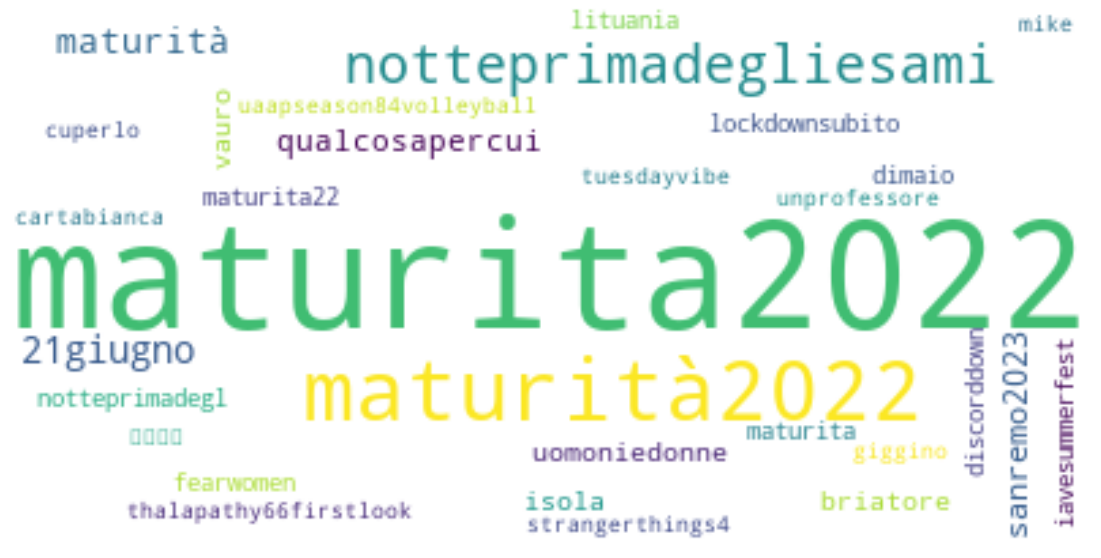

In [172]:
all_hashtags = ' '.join(list_hashtag_strings)
wordcloud = WordCloud(max_font_size=70, max_words=30, 
                      background_color="white", 
                      collocations=False).generate(all_hashtags)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Locations 



In [173]:
counts = tweets_final_df.groupby('location').size()  
df_location = pd.DataFrame(counts, columns = ['size'])    

# we only keep significant cases
df_location = df_location[df_location['size']>3] 
df_location = df_location.sort_values(by='size', ascending=False)
df_location.head(10)

,size
location,
Italia,1162
19 y.o. italy,833
the world’s a little blurry \nmy yellow? oh you meant zayn \nbella hadid love bot \nmy home(n.) billie \nHS2 track 12,760
she/her,743
"Puglia, Italia",597
nowhere,379
she\her,378
"Roma, Lazio",376
xviii ♡ ❪ˢ╱her❫,364


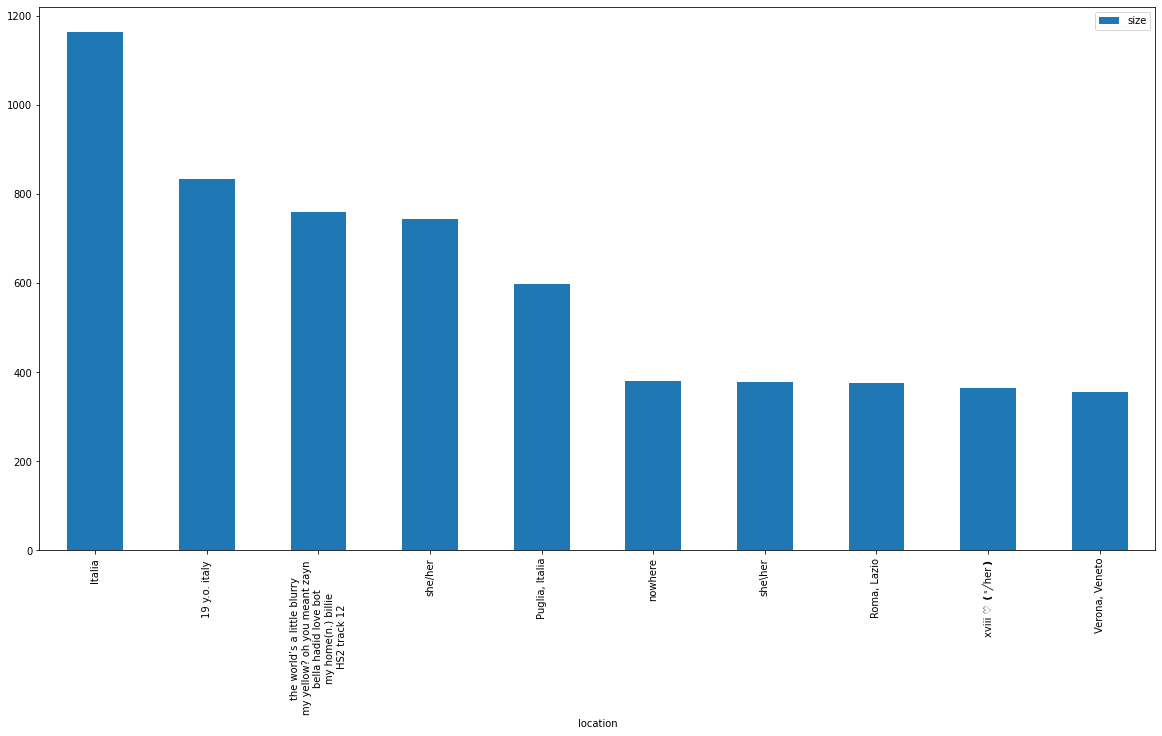

In [174]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
df_location.head(10).plot(kind='bar')

### Users

We use the same technique to analyze the **users**.

In [175]:
tweets_final_df

,created_at,text,source,author_id,retweet_count,like_count,hashtags,name,username,location,verified,user_description
0,2022-06-21 22:12:55+00:00,RT @howajtow: la commissione orale mentre dirò...,Twitter for iPhone,1380560416410116097,285,0,{maturita2022},ΛƧIΛ,asiaortolanii,"Forlì-Cesena, Emilia Romagna",False,in allegato: problemi esistenziali ma tante ri...
1,2022-06-21 22:12:50+00:00,Che ansia ora mi metto a ripassare qualcosa\n#...,Twitter for iPhone,905001220414345217,0,0,{Maturità2022},ℛ𝑜𝑠 𝘥𝘦𝘷𝘦 𝘮𝘢𝘵𝘶𝘳𝘢𝘳𝘴𝘪🥵,roserome1927,Caput Mundi,False,Parlo di tante cose | she/her | ASR - EL92 & L...
2,2022-06-21 22:12:50+00:00,Che ansia ora mi metto a ripassare qualcosa\n#...,Twitter for iPhone,905001220414345217,0,0,{Maturità2022},ℛ𝑜𝑠 𝘥𝘦𝘷𝘦 𝘮𝘢𝘵𝘶𝘳𝘢𝘳𝘴𝘪🥵,roserome1927,Caput Mundi,False,Parlo di tante cose | she/her | ASR - EL92 & L...
3,2022-06-21 22:12:50+00:00,Che ansia ora mi metto a ripassare qualcosa\n#...,Twitter for iPhone,905001220414345217,0,0,{Maturità2022},ℛ𝑜𝑠 𝘥𝘦𝘷𝘦 𝘮𝘢𝘵𝘶𝘳𝘢𝘳𝘴𝘪🥵,roserome1927,Caput Mundi,False,Parlo di tante cose | she/her | ASR - EL92 & L...
4,2022-06-21 22:12:50+00:00,Che ansia ora mi metto a ripassare qualcosa\n#...,Twitter for iPhone,905001220414345217,0,0,{Maturità2022},ℛ𝑜𝑠 𝘥𝘦𝘷𝘦 𝘮𝘢𝘵𝘶𝘳𝘢𝘳𝘴𝘪🥵,roserome1927,Caput Mundi,False,Parlo di tante cose | she/her | ASR - EL92 & L...
...,...,...,...,...,...,...,...,...,...,...,...,...
30748,2022-06-21 08:36:29+00:00,Io domani punto alla traccia B o C sperando ch...,Twitter for Android,3304595717,0,1,{maturita2022},djoker19,celi_luca,None,False,
30749,2022-06-21 08:36:29+00:00,Io domani punto alla traccia B o C sperando ch...,Twitter for Android,3304595717,0,1,{maturita2022},djoker19,celi_luca,None,False,
30750,2022-06-21 08:36:29+00:00,Io domani punto alla traccia B o C sperando ch...,Twitter for Android,3304595717,0,1,{maturita2022},djoker19,celi_luca,None,False,
30751,2022-06-21 08:36:18+00:00,RT @lov3lss: #maturita2022 \normai così disper...,Twitter for iPhone,3624299914,594,0,{maturita2022},Marta🐧,_martuccia_,None,False,


In [176]:
counts = tweets_final_df.groupby('username').size()  
df_user = pd.DataFrame(counts, columns = ['size'])    

df_user = df_user[df_user['size']>3] 
df_user = df_user.sort_values(by='size', ascending=False)
df_user.head(10)

,size
username,
__bubbletae___,833
l0velyh0stage,760
prinxesschia,572
italianfangirl_,518
hivlia_,425
rooosk1,378
V0IDSUGA,364
francxh,360
robyntommo,360


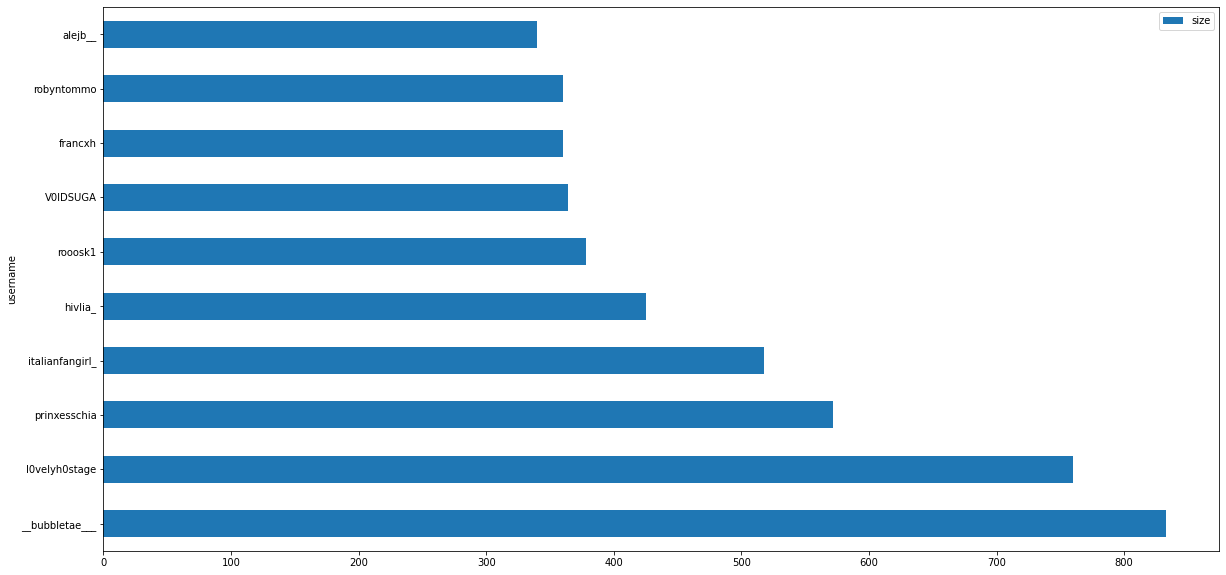

In [177]:
df_user.head(10).plot(kind='barh')

## Instagram


Let's see what you can do with Instagram.
There are several libraries but they are all very experimental. Something can still be done.

Let's try using **instaloader**.

In [178]:
!pip3 install instaloader==4.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 2.6 MB/s 
  Created wheel for instaloader: filename=instaloader-4.9.1-py3-none-any.whl size=61250 sha256=44a65ead6dba772bc13b84e87cee72b8b1efbf35a8831aee4963f15ff63d1f3a
  Stored in directory: /root/.cache/pip/wheels/06/47/51/f85718f7b5c840626ef455f7e6f14246262e42aaa6bef68f9b
Successfully built instaloader


In [179]:
from itertools import islice
from math import ceil

import instaloader

To download the profile of a user, from command line



```
instaloader profile esselunga
```



(found at this link https://instaloader.github.io/basic-usage.html 
all documentation for command line execution)


```
instaloader -l your_user_name
instaloader profile [profile....]

```
To create a corpus of images:

instaloader --no-videos --no-metadata-json --no-captions "#running"


I am now looking for all the posts with the hashtag **unimib** of June 2021.
I use `dropwhile` and `takewhile` that allow me to easily filter the data.


Please specify your username...

In [183]:
!instaloader -l mauropelucchi

Session file does not exist yet - Logging in.
Enter Instagram password for mauropelucchi: 
Logged in as mauropelucchi.
Saved session to /root/.config/instaloader/session-mauropelucchi.
No targets were specified, thus nothing has been downloaded.


In [184]:
from datetime import datetime
from itertools import dropwhile, takewhile

L = instaloader.Instaloader()
L.load_session_from_file("mauropelucchi")
HASHTAG = 'unimib'

posts = instaloader.NodeIterator(
    L.context, "9b498c08113f1e09617a1703c22b2f32",
    lambda d: d['data']['hashtag']['edge_hashtag_to_media'],
    lambda n: instaloader.Post(L.context, n),
    {'tag_name': HASHTAG},
    f"https://www.instagram.com/explore/tags/{HASHTAG}/"
)

SINCE = datetime(2021, 6, 30)
UNTIL = datetime(2021, 6, 1)

for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post.date)
    L.download_post(post, '#unimib')

Loaded session from /root/.config/instaloader/session-mauropelucchi.


I find all the data in the folder **#unimib** under the directory of my notebook

Let's now try to understand who are the most active and the least active followers of an Instagram account (let's take the month of May)

In [185]:

PROFILE = 'unimib'

profile = instaloader.Profile.from_username(L.context, PROFILE)

SINCE = datetime(2021, 6, 2)
UNTIL = datetime(2021, 6, 1)

likes = set()
print('Fetching likes of all posts of profile {}.'.format(profile.username))
posts = profile.get_posts()
for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post)
    likes = likes | set(post.get_likes())


Fetching likes of all posts of profile unimib.
<Post CPk6DU9KCOz>


In [ ]:
likes

In [187]:
SINCE = datetime(2021, 5, 2)
UNTIL = datetime(2021, 5, 1)

likes_5 = set()
print('Fetching likes of all posts of profile {}.'.format(profile.username))
posts = profile.get_posts()
for post in takewhile(lambda p: p.date > UNTIL, dropwhile(lambda p: p.date > SINCE, posts)):
    print(post)
    likes_5 = likes_5 | set(post.get_likes())


Fetching likes of all posts of profile unimib.


In [188]:
likes_5

set()

In [189]:
ghosts = likes_5 - likes

In [190]:
ghosts

set()

new users?

In [191]:
new = likes - likes_5

In [ ]:
new

In [193]:
list_new = []
for profile in new:
    list_new.append({'profile': profile.username})

In [194]:
list_ghost = []
for profile in ghosts:
    list_ghost.append({'profile': profile.username})

In [195]:
import pandas as pd
pd.DataFrame(list_new).to_csv('new.csv')
pd.DataFrame(list_ghost).to_csv('ghost.csv')